# SRIRAM SEELAMNENI


# Economy vs Ecology : Economic growth and Climate change


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
%matplotlib inline
from scipy.special import logsumexp
import statsmodels.api as sm



## Why is it important ?

* It is obvious that climate has drastically changed in past 5 decades due to large-scale industrialization and excessive use of natural resources for rapid development in economy, infrastructure and various sectors.

* Those have been heavily beneficial for economic growth but lead to brewing climate crisis that we are experiencing today.

* It’s important to understand the relation between these two so that nations seeking for rapid development don’t follow the same procedure and realize that economic growth is not growth anymore when its at the cost of environmental damage.

* In process I set out to answer:
    * Is the GDP growth and the climate change correlated?
    * **To what extent does each of these provoke one another?**
    * **How does greenhouse gas emission numbers look like in 2050?**
    * Can Economy and Ecology go hand in hand?

## An overview of how greenhouse gas emissions depend on GDP

* It is known that a nation's GDP extremely depends on availbility and consumption of natural resources. And upon time, excessive use lead to a climate crisis due to significant growth in greenhouse gas emissions. So, theoritically it is very agreeable that these two are realted or more precisely, greesnhouse gas emission depend on GDP.

* Below picture (from statista) shows the top countries in the energy consumption list which are majorly derived from fossil fuels.

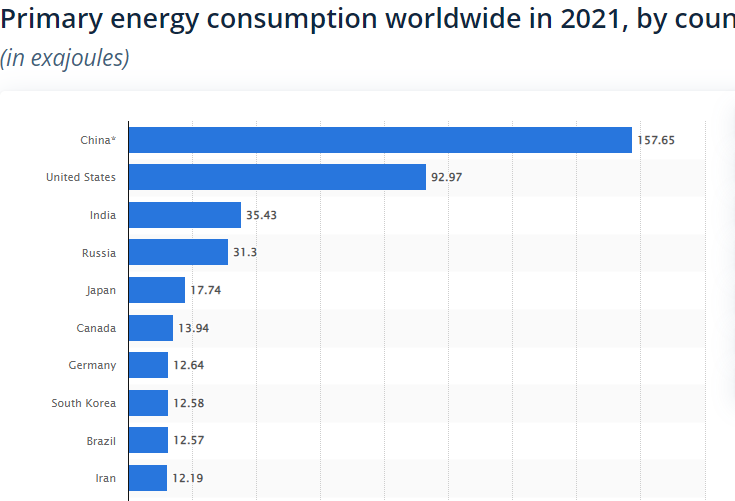

* **The top listed countries above are also at the top GDP table. This clearly hints us that the emissions are dependent on GDP of respective nation.**

* Let's analyze this objectively by data modelling and statistical analysis.

### CO2 DATA

In [3]:

#list of valid country codes
Valid_country_codes = ['AFG', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'HKG', 'MAC', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'PRK', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'VAT', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MYT', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'ANT', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'MNP', 'NOR', 'PSE', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'PRI', 'QAT', 'KOR', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'ESP', 'LKA', 'SDN', 'SUR', 'SJM', 'SWZ', 'SWE', 'CHE', 'SYR', 'TJK', 'THA', 'MKD', 'TLS', 'TGO', 'TKL', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'TZA', 'USA', 'VIR', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'WLF', 'ESH', 'YEM', 'ZMB', 'ZWE']


In [4]:
#Loading in the CO2 emission dataset
CO2_data = pd.read_excel('CO2_emmision.xls',skiprows=[0,1])
#Updating the columns to appropriate names
CO2_data.columns =   CO2_data.iloc[0,:]
CO2_data = CO2_data.drop(labels = 0, axis = 0) 

#removing the invalid (non-country) data
invalid_code_indexes = []
for index,code in enumerate(CO2_data ['Country Code']):
    if code not in Valid_country_codes:
        invalid_code_indexes.append(index)
    
CO2_data  = CO2_data.drop(labels = invalid_code_indexes,axis=0)
CO2_data .reset_index(drop=True)

CO2_data


,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
2,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.000000,...,44059.000000,44351.000000,44666.000000,44978.000000,45293.000000,45614.000000,45949.000000,46294.000000,46654.000000,47022.000000
3,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.544810,...,0.543931,0.660561,0.707733,0.696090,0.697901,0.706219,0.731740,0.748028,0.774631,0.785691
4,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.000,55434.000000,56234.000000,56699.000000,57029.000000,57357.000000,...,102565.000000,103165.000000,103776.000000,104339.000000,104865.000000,105361.000000,105846.000000,106310.000000,106766.000000,107195.000000
5,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.236462,1.432843,0.823502,0.580334,0.573498,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,0.401008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20213,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20214,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN
20215,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN


In [4]:
#Cleaning the dataset by getting rid of unnecessary information
#We only need specific indicators for our analysis

cleaned = CO2_data[(CO2_data['Indicator Name']=="Population growth (annual %)")| 
                   (CO2_data['Indicator Name']=="Total greenhouse gas emissions (% change from 1990)")|
                   (CO2_data['Indicator Name']== "Total greenhouse gas emissions (kt of CO2 equivalent)")|
                   (CO2_data['Indicator Name']== "CO2 emissions (kt)")|
                   (CO2_data['Indicator Name']== "Forest area (% of land area)")|
                   (CO2_data['Indicator Name']== "Agricultural land (% of land area)")]
cleaned = cleaned.drop(columns = ['Indicator Code'],axis=1)
cleaned=cleaned.dropna(axis=0,how='all',thresh=20)

cleaned.reset_index(drop=True)



,Country Name,Country Code,Indicator Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,Population growth (annual %),NaN,2.236462,1.432843,0.823502,0.580334,0.573498,0.599694,...,0.503385,0.583290,0.590508,0.541048,0.502860,0.471874,0.459266,0.437415,0.428017,0.401008
1,Aruba,ABW,Forest area (% of land area),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN
2,Aruba,ABW,Agricultural land (% of land area),NaN,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,...,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,NaN
3,Afghanistan,AFG,Population growth (annual %),NaN,1.898499,1.965805,2.029830,2.090208,2.147639,2.171068,...,3.407600,3.494592,3.355602,3.077054,2.778035,2.547833,2.384309,2.313073,2.303812,2.303412
4,Afghanistan,AFG,Total greenhouse gas emissions (% change from ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,Zimbabwe,ZWE,Total greenhouse gas emissions (% change from ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.289436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30719.999313,30610.000610,28899.999619,30700.000763,28530.000687,28299.999237,30829.999924,30530.000687,NaN,NaN
1181,Zimbabwe,ZWE,CO2 emissions (kt),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12010.000229,12279.999733,12079.999924,12430.000305,11020.000458,10340.000153,12380.000114,11760.000229,NaN,NaN
1182,Zimbabwe,ZWE,Forest area (% of land area),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.046633,45.927543,45.808453,45.689363,45.570273,45.451183,45.332093,45.213002,45.093912,NaN


In [5]:
totalemissions_data = cleaned[cleaned['Indicator Name']== "Total greenhouse gas emissions (kt of CO2 equivalent)"]

#Total emissions by world each year from 1960
emissions_by_year = []


time_years = []
for time in totalemissions_data.columns[3:]:
    emissions_by_year.append(totalemissions_data[time].sum())
    time_years.append(time)
totalemissions_data.reset_index(drop=True)


,Country Name,Country Code,Indicator Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28799.999237,27020.000458,26760.000229,27090.000153,26889.999390,26530.000687,27690.000534,28639.999390,NaN,NaN
1,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77400.001526,81089.996338,82389.999390,87360.000610,85910.003662,81010.002136,75239.997864,79680.000305,NaN,NaN
2,Albania,ALB,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8880.000114,8930.000305,9359.999657,9220.000267,9090.000153,9659.999847,9449.999809,9010.000229,NaN,NaN
3,Andorra,AND,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,600.000024,589.999974,569.999993,579.999983,589.999974,589.999974,620.000005,629.999995,NaN,NaN
4,United Arab Emirates,ARE,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,219589.996338,230889.999390,231800.003052,245220.001221,252919.998169,248690.002441,229380.004883,243550.003052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Samoa,WSM,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,529.999971,540.000021,560.000002,610.000014,670.000017,680.000007,680.000007,680.000007,NaN,NaN
186,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44500.000000,54090.000153,52319.999695,29459.999084,23899.999619,23840.000153,23860.000610,25260.000229,NaN,NaN
187,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,538549.987793,548349.975586,560859.985352,536119.995117,536190.002441,550700.012207,549650.024414,555429.992676,NaN,NaN
188,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34560.001373,35360.000610,35419.998169,36310.001373,36389.999390,36700.000763,37560.001373,37569.999695,NaN,NaN


### GDP DATA

In [6]:
gdp_data = pd.read_csv('gdp_data.csv',skiprows=[0,1,2])

gdp_data=gdp_data.drop(columns=['Indicator Code','Indicator Name'],axis=1)

gdp_data = gdp_data.dropna(axis=1,how='all')

#removing invalid (non-country data)
invalid_code_indexes = []

for index,code in enumerate(gdp_data['Country Code']):
    if code not in Valid_country_codes:
        invalid_code_indexes.append(index)
   
    
gdp_data = gdp_data.drop(labels = invalid_code_indexes,axis=0)
gdp_data.reset_index(drop=True)

#Total GDP of the world from 1960
gdp_by_year = []
for i in range(2,len(gdp_data.columns)):
    gdp_by_year.append(gdp_data.iloc[:,i].sum())
    
gdp_by_year
gdp_data

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
5,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540183e+10,1.513187e+10,1.826004e+10
6,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.188653e+09,3.193513e+09,3.271686e+09,2.789881e+09,2.896610e+09,3.000162e+09,3.218420e+09,3.155149e+09,2.891001e+09,3.329911e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.605496e+08,7.700596e+08,7.568060e+08,7.883073e+08,7.994939e+08,8.320256e+08,8.212869e+08,8.520071e+08,8.071475e+08,7.883900e+08
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10
263,South Africa,ZAF,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,4.199464e+11
264,Zambia,ZMB,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.120306e+10


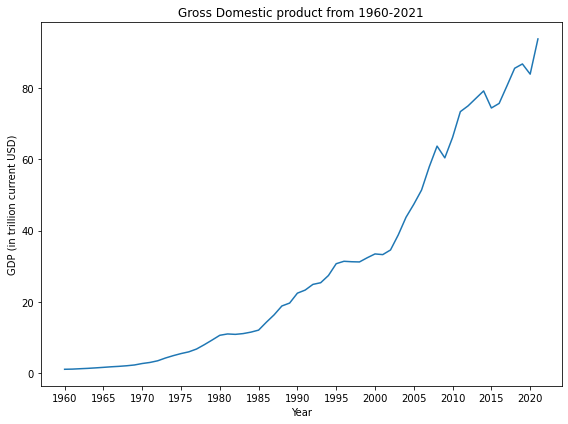

In [7]:
#global GDP plot
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot(time_years,np.array(gdp_by_year,dtype=float)/10**12)
plt.xlabel('Year')
plt.ylabel('GDP (in trillion current USD)')
plt.title('Gross Domestic product from 1960-2021')
axs.xaxis.set_major_locator(plt.MaxNLocator(14))
plt.savefig("GDP 1960-2021")
plt.tight_layout()


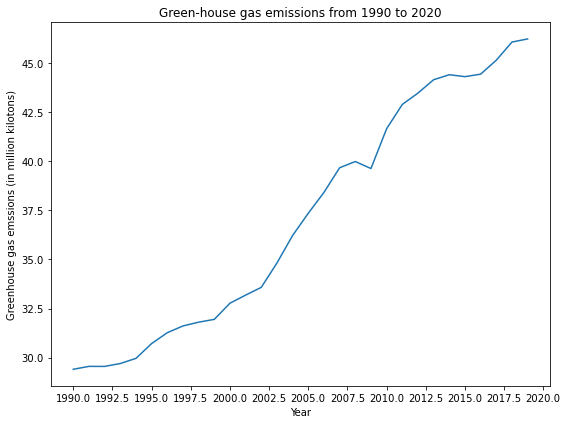

In [8]:
#Golbal greenhouse gas emissions
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot(time_years[30:-2],np.array(emissions_by_year[30:-2],dtype=float)/10**6)
plt.ylabel('Greenhouse gas emssions (in million kilotons)')
plt.xlabel('Year')
plt.title('Green-house gas emissions from 1990 to 2020')
axs.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig("GGE 1990-2021")
plt.tight_layout()

# Methodology : Correlation and Regression

* To answer the question, "To what extent are they provoke each other?", I set out to do statistical analysis on the GDP and CO2 datasets.
* Two statistic parameters I'm going to use for my hypothesis are **Correlation and regression.**
* **Correlation analysis seeks to identify (by a single number) the degree to which there is a (linear) relation between the numbers in sets of data pairs.**
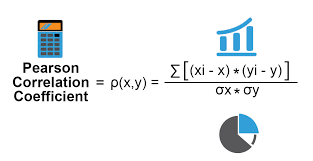

* **Regression analysis is used to determine if a relationship exists between two variables by creating a curve that best fits the set of data pairs.**

## Correlation

In [9]:
correlation_coef_data = []

# These two lists contain corresponding gdp and emissions data
gdp_list = []
emissions_list = []


for country in list(gdp_data['Country Code']):
    #to counter the keyerror(as countries are not common in both datasets)
    try:
        emissions = list(np.array(totalemissions_data.loc[totalemissions_data['Country Code']==country])[0][3:])
        gdp = list(np.array(gdp_data.loc[gdp_data['Country Code']==country])[0][2:])
        ## getting rid of all non-numeric values ##
        
        gdp = np.array(gdp,dtype=float)
        emissions = np.array(emissions,dtype=float)
        #masking with respect to gdp
        mask_wrt_gdp = np.isfinite(gdp)
        gdp = gdp[mask_wrt_gdp]
        emissions = emissions[mask_wrt_gdp]
        
        #masking with respect to emissions
        mask_wrt_ems = np.isfinite(emissions)
        gdp = gdp[mask_wrt_ems]
        emissions = emissions[mask_wrt_ems]
        
        #adding data to cummulative lists
        gdp_list += list(gdp)
        emissions_list +=  list(emissions)
        
        #correlation coefficient calculation
        correalation_coef = round(np.corrcoef(gdp,emissions)[0,1],4)
        #correlation_coef_data.append([country,correlation_cof])
        correlation_coef_data.append([country,correalation_coef])
    #if an error is found, loop continues without stopping
    except:
        continue
    
correlation_coef_data

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


[['AFG', 0.9698],
 ['AGO', 0.8312],
 ['ALB', 0.5844],
 ['AND', 0.8165],
 ['ARE', 0.9802],
 ['ARG', 0.7951],
 ['ARM', -0.0237],
 ['ATG', 0.8399],
 ['AUS', 0.6678],
 ['AUT', -0.0093],
 ['AZE', 0.0462],
 ['BDI', 0.9304],
 ['BEL', -0.8948],
 ['BEN', 0.9642],
 ['BFA', 0.9726],
 ['BGD', 0.9331],
 ['BGR', -0.6076],
 ['BHR', 0.9862],
 ['BHS', 0.3116],
 ['BIH', 0.9426],
 ['BLR', -0.1228],
 ['BLZ', -0.6923],
 ['BOL', 0.9699],
 ['BRA', 0.8906],
 ['BRB', 0.4751],
 ['BRN', 0.886],
 ['BTN', 0.9641],
 ['BWA', 0.1409],
 ['CAF', -0.0059],
 ['CAN', 0.8524],
 ['CHE', -0.6581],
 ['CHL', 0.9582],
 ['CHN', 0.9496],
 ['CIV', 0.3693],
 ['CMR', 0.44],
 ['COD', 0.8474],
 ['COG', 0.8492],
 ['COL', 0.926],
 ['COM', 0.8815],
 ['CPV', 0.9579],
 ['CRI', 0.9684],
 ['CUB', 0.1241],
 ['CYP', 0.8091],
 ['CZE', -0.8073],
 ['DEU', -0.8887],
 ['DJI', 0.6274],
 ['DMA', 0.4309],
 ['DNK', -0.797],
 ['DOM', 0.9404],
 ['DZA', 0.8943],
 ['ECU', 0.9346],
 ['EGY', 0.9195],
 ['ERI', 0.6292],
 ['ESP', 0.422],
 ['EST', 0.0252],
 ['ET

In [10]:
coefficients = np.array(correlation_coef_data)[:,1].astype(float)
print(np.nanmean(coefficients),np.nanstd(coefficients))

0.5278063492063492 0.5617529848060654


###  Average Correlation coefficeint : 0.528

* A postive correlation coefficent close to 1 means a strong positive relation between the two varibles, in our case, are GDP and Greenhouse gas emissions.

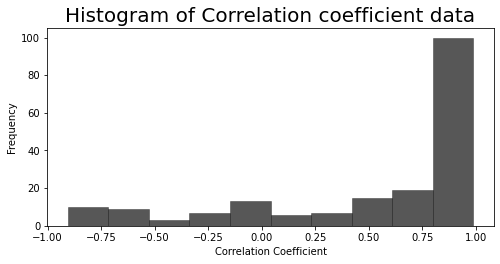

In [11]:
plt.figure(figsize=[8,8])

plt.subplot(2,1,1)
plt.hist(coefficients,facecolor='#101010', edgecolor='#111111', linewidth=0.5, alpha=0.7)
plt.title('Histogram of Correlation coefficient data',fontsize=20)
plt.xlabel('Correlation Coefficient')
plt.savefig("CC hist")
plt.ylabel('Frequency')

countries_strong_correlation = len(list(x for x in coefficients if 0.5 <= x <= 1))
percent_positive_countries = countries_strong_correlation/len(coefficients)*100

In [12]:
print(round(percent_positive_countries,2),"% of countries have a strong correlation greater than 0.5")

67.37 % of countries have a strong correlation greater than 0.5


## Regression 
### Bivariate analysis of GDP and Emission data

In [13]:
x = np.array(gdp_list)/10**12
y = np.array(emissions_list)/(10**6)

# function to scatter plot gdp and emission
def plotme(x,y):
    plt.scatter(x,y)
    plt.ylabel('Greenhouse gas emssions (in million kilotons)')
    plt.xlabel('GDP (in trillion current USD)')
    plt.title('Scatterplot of GDP and Greenhouse gas emissions',fontweight='bold')
    plt.yscale('linear')

    plt.tight_layout()

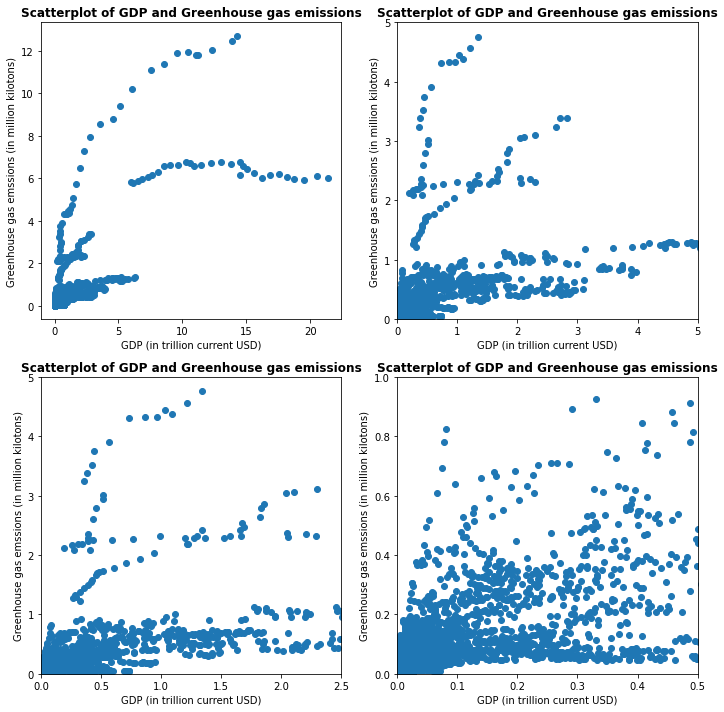

In [14]:
# Subplots of scatter plot with various xlim and ylim to show overlapping data
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plotme(x,y)

plt.subplot(2,2,2)
plotme(x,y)
plt.xlim(0,5)
plt.ylim(0,5)

plt.subplot(2,2,3)
plotme(x,y)
plt.xlim(0,2.5)
plt.ylim(0,5)

plt.subplot(2,2,4)
plotme(x,y)
plt.xlim(0,0.5)
plt.ylim(0,1)

plt.savefig("scatter GDP-GGE")
plt.tight_layout()

### An attempt to obtain mathematical relation using Curve-fit
* More data is concentrated between GDP data of  0 to 1 trillion USD and emissions upto 1 million kilotons. As a result, I'm going to mask the datasets that reflect those limits for better and efficient mathematical equation.
* Although GDP and Greenhouse gas emssions are very complex and abstract that involves so many other parameters, this is an attempt to simplify those phenomenons for the sake of analysis and a better understanding. 
* I'm starting by a simple linear relation to find out the slope which can tell us how change in variable changes other one.

In [15]:
GDP_lim_sample  = np.array(gdp_list)/10**12   #in trillion USD
GGE_lim_sample = np.array(emissions_list)/(10**6)  #in trillion pounds

def mask_me(GDP_lim_sample,GGE_lim_sample):
    mask_wrt_GDP = GDP_lim_sample<=1

    # masking wrt GDP (less than one trillion)

    GDP_masked = GDP_lim_sample[mask_wrt_GDP]
    GGE_masked = GGE_lim_sample[mask_wrt_GDP]

    mask_wrt_GGE = GGE_masked<=1
    # masking wrt GGE
    GDP_masked = GDP_masked[mask_wrt_GGE]
    GGE_masked = GGE_masked[mask_wrt_GGE]
    
    return GDP_masked, GGE_masked

GDP_lim,GGE_lim = mask_me(GDP_lim_sample,GGE_lim_sample)

# Total gdp and emissions of world from 1990 (emissions data not available until 1990)
GDP_world = np.array(gdp_by_year[30:-2])/10**12   #in trillion USD
GGE_world = np.array(emissions_by_year[30:-2])/10**6  #in million kilotons

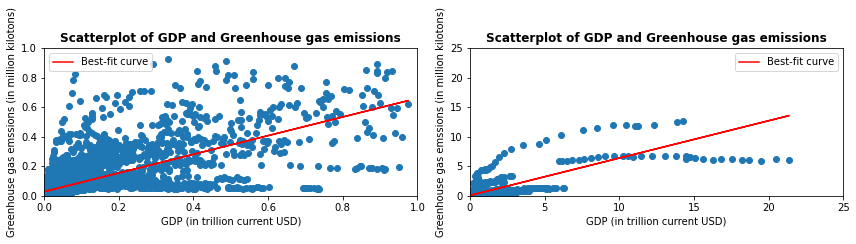

In [16]:

# function for scipy curve_fit analysis

def fun(GDP,m,b):
    return m*GDP+b

#function that calculates best fit data
def best_fit_data(GDP_lim,GGE_lim):
    best_fit_param, ignore = curve_fit(fun,GDP_lim,GGE_lim)

    m = best_fit_param[0]
    b = best_fit_param[1]

    GGE = fun(GDP_lim,m,b)
    
    return GGE,m,b

GGE_best_fit_country, best_fit_slope_country,intercept_c= best_fit_data(GDP_lim,GGE_lim)
GGE_best_fit_world,   best_fit_slope_world, intercept_w = best_fit_data(GDP_world,GGE_world)

x = np.array(gdp_list)/10**12
y = np.array(emissions_list)/(10**6)

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plotme(x,y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(GDP_lim,GGE_best_fit_country,color='r',label="Best-fit curve")
plt.legend()
plt.tight_layout(rect=[0, 0.3, 1.5, 0.95])
plt.savefig("GDP-GGE bestfit1")

plt.subplot(2,2,2)
plotme(x,y)
best_fit_linear = best_fit_slope_country*x+intercept_c
plt.plot(x,best_fit_linear,color='r',label="Best-fit curve")
plt.ylim(0,25)
plt.xlim(0,25)
plt.legend()

plt.tight_layout(rect=[0, 0.3, 1.5, 0.95])
plt.savefig("GDP-GGE bestfit2")

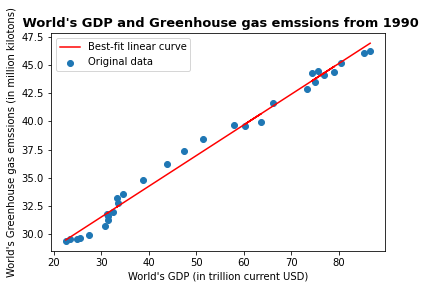

In [17]:
plt.scatter(GDP_world,GGE_world,label="Original data")
plt.plot(GDP_world,GGE_best_fit_world,color='r',label="Best-fit linear curve")
plt.ylabel("World's Greenhouse gas emssions (in million kilotons)")
plt.xlabel("World's GDP (in trillion current USD)")
plt.title(" World's GDP and Greenhouse gas emssions from 1990",fontsize=13,fontweight='bold')
plt.savefig("World GDP-GGE best_fit")
plt.legend()

##### OLS Regresssion Model

In [18]:
x = sm.add_constant(GDP_lim)

#fit linear regression model
model = sm.OLS(GGE_lim, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5432.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:52:18   Log-Likelihood:                 4992.0
No. Observations:                5142   AIC:                            -9980.
Df Residuals:                    5140   BIC:                            -9967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.001     18.581      0.0

### Predicting Carbon emissions in 2050

* **Global economy was expected to hit 165 trillion USD in 2050.**

In [19]:
global_gdp_2050 = 165
emissions_2050 = global_gdp_2050*best_fit_slope_world+intercept_w
percent_change_1990 = (emissions_2050-GGE_world[0])/GGE_world[0]*100
percent_change_2019 = (emissions_2050-GGE_world[-3])/GGE_world[-3]*100
print("The total carbon emissions will hit ",round(emissions_2050,3)," million kilotons by 2050")
print("The total carbon emissions increased by ",round(percent_change_1990,2),"% since 1990")
print("The total carbon emissions will increase by ",round(percent_change_2019,2),"% since 2019")

The total carbon emissions will hit  68.209  million kilotons by 2050
The total carbon emissions increased by  131.96 % since 1990
The total carbon emissions will increase by  51.07 % since 2019


# Results

* The analysis in this paper considers the GDP (the independent variable) and total emissions (dependent variable) as the defining and quantitative variables of Economy and ecology respectively. As we have seen from the energy consumption picture above,there are common countries at the top of both GDP and energy consumption table. This clearly hints us that the emissions are dependent on the GDP of respective nation.

* The statistical analysis through Pearson correlation coefficient model revealed that there is a strong correlation between GDP and total emissions with an **average coefficent of 0.5621**. Around **69.46%** of total countries have a strong correlation no less than 0.5.
* Going on to the regression model, we have acquired the corresponding GDP and emissions data of all possible countries at all years. The scatter plot revealed that heavy data was concentrated below gdp 1 trillion USD as its true for most of the countries. So, model built on those limits resulted in a R-squared value of 0.46 and more importantly a p-value so close to zero, which proves that there is a significant relationship between two variables, GDP and green-house gas emissions.
* **The global economy is expected to hit 165 trillion USD by 2050. Based on our mathematical model, we predicted carbon emissions would reach 68 million kilotons, more than twice the emissions in 1990 , nearly 132% increase, which is very worrying.**

(-0.5, 431.5, 287.5, -0.5)

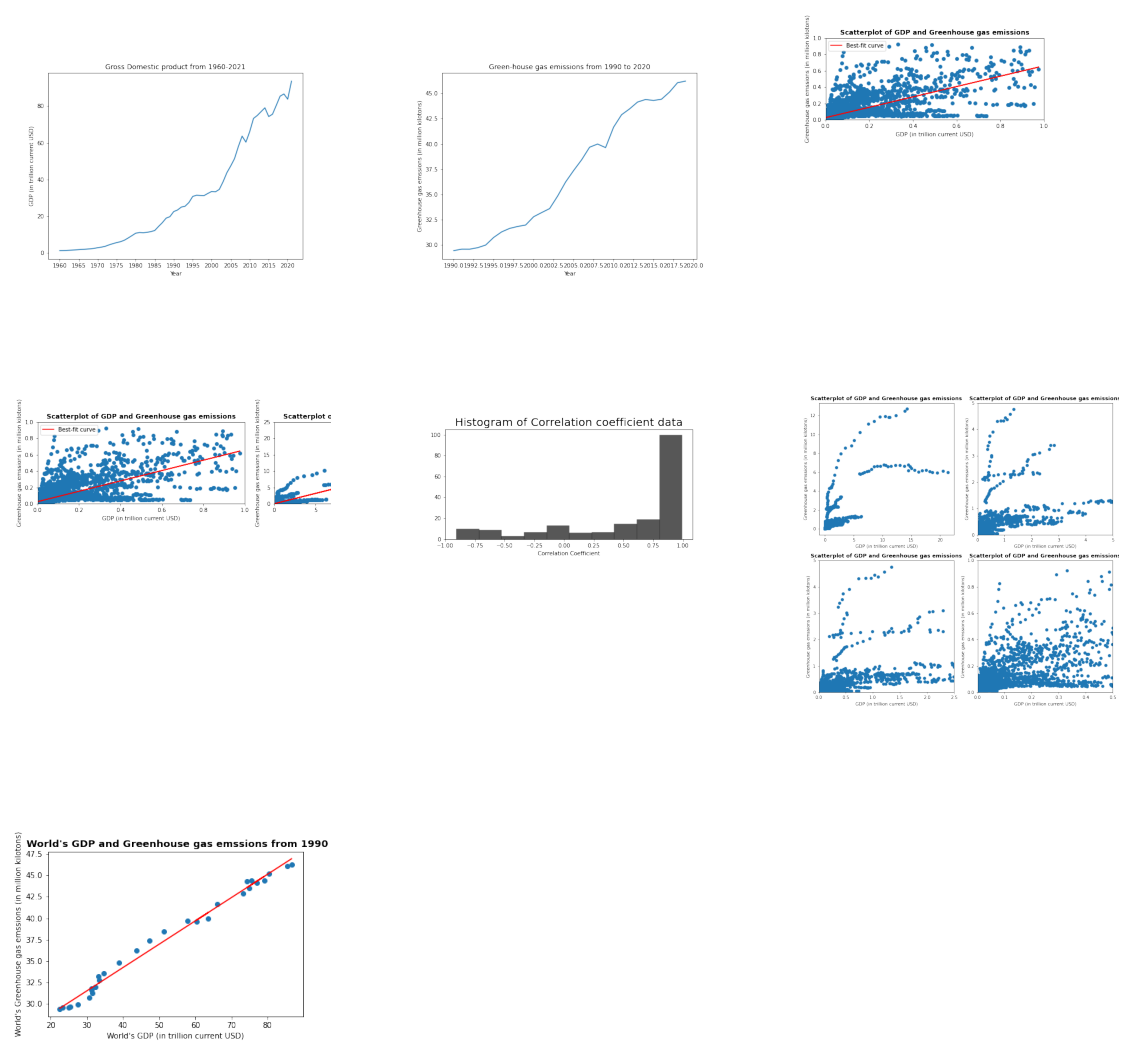

In [20]:
#Plots used in presentation
from PIL import Image
picture1 = Image.open("GDP 1960-2021.png")
picture2 = Image.open("GGE 1990-2021.png")
picture3 = Image.open("GDP-GGE bestfit1.png")
picture4 = Image.open("GDP-GGE bestfit2.png")
picture5 = Image.open("CC hist.png")
picture6 = Image.open("scatter GDP-GGE.png")
picture7 = Image.open("World GDP-GGE best_fit.png")

plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
plt.imshow(picture1)
plt.axis('off')
plt.subplot(3,3,2)
plt.imshow(picture2)
plt.axis('off')
plt.subplot(3,3,3)
plt.imshow(picture3)
plt.axis('off')
plt.subplot(3,3,4)
plt.imshow(picture4)
plt.axis('off')
plt.subplot(3,3,5)
plt.imshow(picture5)
plt.axis('off')
plt.subplot(3,3,6)
plt.imshow(picture6)
plt.axis('off')
plt.subplot(3,3,7)
plt.imshow(picture7)
plt.axis('off')

# Discussion

Looking at the results, we understand that climate is going through immense changes at faster rate. It might come to a point where the GDP growth starts affecting economy negatively due to effects the climate change has on other aspects of a nation's economy. Right now, we are looking at this analysis as carbon emissions depend on GDP, but soon it might reverse as a result of current trends. 
As George E.P Box said once "All models are wrong, some are useful". I believe despite the fact that I made a simple model for complex phenomenon, this is a better model for predictions and understand the abstract relations between GDP and carbon emissions.This project gave me confidence that I have certain tools in my hand that can help me understand real-life phenomenons. If I were to do anything different, I would have a dataset that describes a better co-depenndent relation between GDP and carbon emissions to make my analysis even stronger.

# Sources

* The World bank, Retrieved December 12 2022, from https://data.worldbank.org/

* "Degrowth – what's behind the economic theory and why does it matter right now?", June 15 2022 , from https://www.weforum.org/agenda/2022/06/what-is-degrowth-economics-climate-change/

* Statista, Retrieved December 12 2022  from https://www.statista.com/statistics/263455/primary-energy-consumption-of-selected-countries/